In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('communities.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
df=df.replace('?',np.nan)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
con=open('communities.txt','r').read()

In [7]:
con1=con.split('\n-- ')

In [8]:
header=[]
for c in con1:
    header.append(c.split(': ')[0])

In [9]:
print(header[1:])

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [10]:
df.columns=header[1:]

In [11]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [12]:
df1=df.drop(['state', 'county', 'community', 'communityname', 'fold'],axis=1)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [13]:
df1.dropna(inplace=True)

In [14]:
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


TASK 2

In [15]:
from sklearn.model_selection import train_test_split
X_data=df1.iloc[:,:-1]
Y_data=df1.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=1)

In [16]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1).fit(X_train,Y_train)
predict=ridge.predict(X_test)
predict

array([ 0.93663348,  0.85402671,  0.41985241,  0.40704823,  0.01320246,
        0.71091738,  0.0562085 ,  0.17104593,  0.23651376,  0.42776694,
        0.40873197,  0.23349738,  0.27553815,  0.47736411,  0.68971331,
        0.5331729 ,  0.53598756,  0.33925502,  0.46611192,  0.72843347,
        0.38388764,  0.20039019,  0.62117081,  0.24253709,  0.63077414,
        0.25252701,  0.15678903,  0.29778242,  0.45138253,  0.48423155,
        0.3387146 ,  0.17095731,  0.12443935,  0.45570395,  0.05224695,
        0.46620954,  0.1995175 ,  0.04758625,  0.7502777 ,  0.40752059,
        0.697729  ,  0.65836983,  0.59437962,  0.27696701,  0.869143  ,
        0.69400369,  0.35037079,  0.8580569 ,  0.57166648,  0.19388347,
        0.70248271,  0.4387788 ,  0.31915121,  0.42061089,  0.50850391,
        0.93121603,  0.25374425,  0.31618303,  0.19274148,  0.77881363,
        0.4900605 ,  0.25835878,  0.25725247,  0.2527471 ,  0.77501094,
        0.34554633,  0.25812509,  0.4363599 ,  0.61752688,  0.43

TASK 3

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mean_squared_error(Y_test,predict)

0.0282284684021903

In [19]:
mean_absolute_error(Y_test,predict)

0.12779368055068085

In [20]:
np.sqrt(mean_squared_error(Y_test,predict))

0.16801329828971961

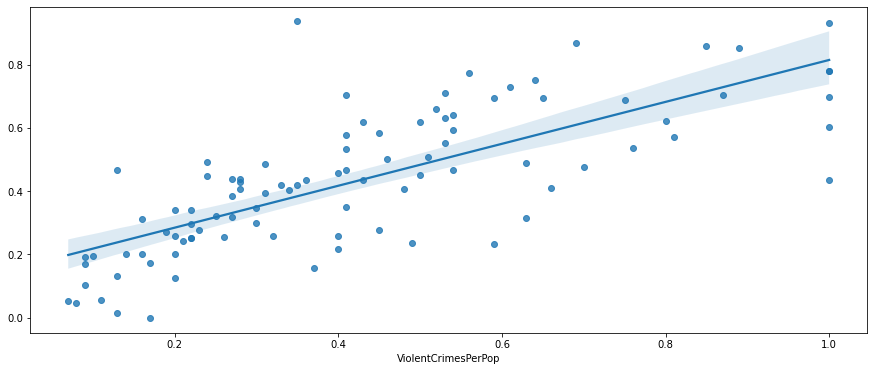

In [21]:
fig,ax= plt.subplots(figsize=(15,6))
sns.regplot(x=Y_test,y=predict)
plt.show()

TASK 4

In [22]:
alpha1=[]
test_error=[]
train_error=[]
for a in [10**x for x in range(-10,11,1)]:
    alpha1.append(a)
    ridge=Ridge(alpha=a).fit(X_train,Y_train)
    predict_test=ridge.predict(X_test)
    predict_train=ridge.predict(X_train)
    test_error.append(mean_squared_error(Y_test,predict_test))
    train_error.append(mean_squared_error(Y_train,predict_train))

In [23]:
pl=pd.DataFrame([alpha1,test_error,train_error]).T

In [24]:
pl.columns=['Alpha','Test_error','Train_error']

In [25]:
pl

,Alpha,Test_error,Train_error
0,1.000000e-10,0.049863,0.010233
1,1.000000e-09,0.049863,0.010233
2,1.000000e-08,0.049862,0.010233
3,1.000000e-07,0.049850,0.010233
4,1.000000e-06,0.049736,0.010234
5,1.000000e-05,0.049017,0.010277
6,1.000000e-04,0.047549,0.010558
7,1.000000e-03,0.043191,0.010818
8,1.000000e-02,0.035542,0.011598
9,1.000000e-01,0.029417,0.013976


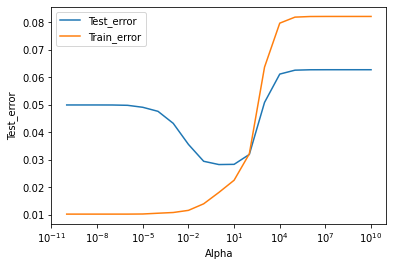

In [26]:
sns.lineplot(data=pl, x='Alpha', y='Test_error',label='Test_error')
sns.lineplot(data=pl, x='Alpha', y='Train_error',label='Train_error')
plt.xscale('log')

In [27]:
ind=pl[pl.Test_error==pl.Test_error.min()].index

In [28]:
pl.iloc[ind]

,Alpha,Test_error,Train_error
10,1.0,0.028228,0.018106


TASK 5

In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1).fit(X_train,Y_train)
lasso_predict=lasso.predict(X_test)
lasso_predict

array([0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829

In [30]:
ridge_predict=Ridge(alpha=10**(-100)).fit(X_train,Y_train).predict(X_test)
ridge_predict

array([ 1.21931474,  0.771266  ,  0.54462533,  0.44543703,  0.24733468,
        0.72273292,  0.16680649,  0.16558941,  0.11165217,  0.2687862 ,
        0.35319471,  0.21222369, -0.07338987,  0.64009618,  0.82323023,
        0.61138163,  0.43474799, -0.05398641,  0.48518578,  0.75316212,
        0.25807521,  0.05938036,  0.54720918,  0.25733682,  0.25866972,
        0.2298325 ,  0.26943666,  0.40152271,  0.05283034,  0.49161698,
        0.2814328 ,  0.01372278,  0.20474946,  0.65860895,  0.01081104,
        0.43955839,  0.04361468,  0.02009565,  0.69810182,  0.29212343,
        0.75450966,  0.7436671 ,  0.5216488 ,  0.31274492,  0.71943736,
        0.58173274,  0.30569147,  0.86284794,  0.56028261,  0.3303681 ,
        0.67655013,  0.70223619,  0.32095484,  0.38273827,  0.35338248,
        0.49276054,  0.30146001,  0.22132609,  0.03866758,  0.61459607,
        0.42393492,  0.5499259 ,  0.46255662,  0.23022404,  0.61204648,
        0.35785725,  0.23836009,  0.15186744,  0.53520565,  0.59

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


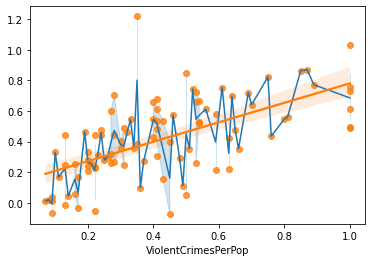

In [31]:
sns.lineplot(Y_test,ridge_predict)
sns.regplot(Y_test,ridge_predict)
plt.show()

In [32]:
mean_squared_error(Y_test,lasso_predict)

0.06265726192211787

In [33]:
np.sqrt(mean_squared_error(Y_test,lasso_predict))

0.2503143262422626

In [34]:
mean_absolute_error(Y_test,lasso_predict)

0.2062429932735426

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


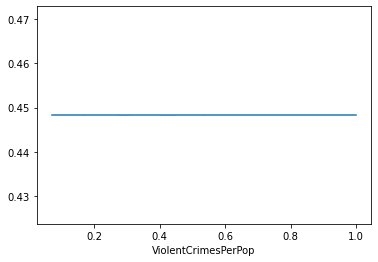

In [35]:
sns.lineplot(Y_test,lasso_predict)
plt.show()

In [52]:
lasso.coef_== int(0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [53]:
lasso.coef_

array([ 0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.])

In [61]:
type(lasso.coef_[0])

numpy.float64

In [54]:
lasso=Lasso(alpha=10**10).fit(X_train,Y_train)
lasso_predict=lasso.predict(X_test)
lasso_predict

array([0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829

In [55]:
lasso.coef_

array([ 0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.])

In [59]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

lasso coefficient is non_zero and there is no affect of alpha strength on it.